# Trend Data EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Uploading the data to perform exploratrory data analysis. 

In [2]:
df = pd.read_csv('/content/Trend Data Dashboard.csv')

Printing the first 5 values of the data to get the insights of the data

In [3]:
df.head()

,Platform,Month,Trend,Trend Type,Music,Video Style,Theme,Part of Song,Video length in S,Music Genre
0,TikTok,202006,I Win,Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,7,NaN
1,TikTok,202006,I am Jose Mourinho,Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,5,NaN
2,TikTok,202006,I'm Gonna Live Forever,Lip Sync (music),Fame - Irene Cara (1980),Selfie Video,Comedy,Chorus,8,Pop
3,TikTok,202006,That's My Life (Hilary Duff),Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,5,NaN
4,TikTok,202006,Hot New Bombshell (Love Island),Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,6,NaN


The below mentioned code will get you to know the numbers of rows and columns in the data.

In [4]:
df.shape

(37, 10)

Let's check that whether there are either any null values available or not. 

In [5]:
df.isnull().sum()

Platform              0
Month                 0
Trend                 0
Trend Type            0
Music                14
Video Style           0
Theme                 0
Part of Song         14
Video length in S     0
Music Genre          14
dtype: int64

Code for dropping Nan Values.

In [6]:
data = df.dropna()
print(data.shape)
test = df[~df["Music Genre"].notna()].drop("Music Genre",axis=1)
print(test.shape)

(23, 10)
(14, 9)


In [8]:
data[ :5]

,Platform,Month,Trend,Trend Type,Music,Video Style,Theme,Part of Song,Video length in S,Music Genre
2,TikTok,202006,I'm Gonna Live Forever,Lip Sync (music),Fame - Irene Cara (1980),Selfie Video,Comedy,Chorus,8,Pop
6,TikTok,202006,Things People Have Said to Me,Dance + Lip Sync (music),Happiness - Alexis Jordan (2010),Selfie Video,Comedy,Chorus,24,R&B
7,TikTok,202006,Benny and the Jets x Chiquitita,Montage,Benny and the Jets - Elton John (1974) Chiquit...,Photo/Video Compilation,Lifestyle,Prelude; Interlude,12,Rock; Pop
8,TikTok,202006,Feel No Ways (took one for the team),Dance + Filter,Feel No Ways - Drake (2016),Video with Horace filter,Comedy,First verse,5,Hip-Hop/Rap
11,TikTok,202006,Sands (Background Music),"Text on Screen, Vlog",Sands - Lethilda (2021),"Selfie Video, Photo/Video Compilation",Lifestyle,First verse,8,Pop


Plotting graph using seaborn library , between video length which is given in seconds, v/s Month .

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


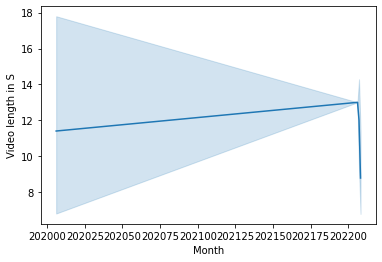

In [10]:
sns.lineplot(data["Month"],data["Video length in S"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

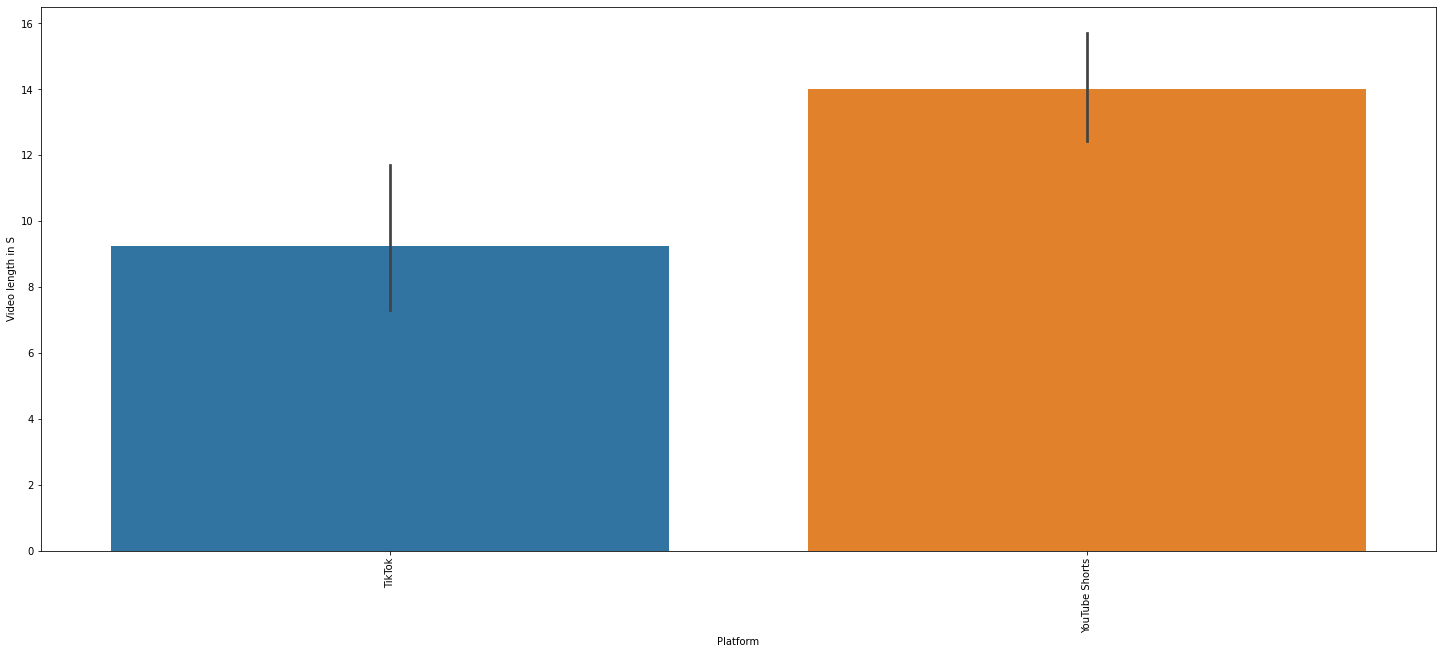

In [11]:
plt.figure(figsize=(25,10))
sns.barplot(data["Platform"],data["Video length in S"])
plt.xticks(rotation=90)

### Observation:
This graph shows the relatio between the platfrom (tik tok, youtube shorts) and the video length in seconds. 

Hence we discovered that Youtube shorts has more time as compared to the tiktok.

In [12]:
data.groupby("Platform",axis=0).agg({"Video length in S":np.sum})

,Video length in S
Platform,
TikTok,148
YouTube Shorts,98


Let's select one genre among all those mentioned in the data, and perform analysis and data visualisation on that genre. 

In [18]:
pop_df = data[data["Music Genre"]=="Pop"]
print(pop_df.shape)
pop_df[:3]

(14, 10)


,Platform,Month,Trend,Trend Type,Music,Video Style,Theme,Part of Song,Video length in S,Music Genre
2,TikTok,202006,I'm Gonna Live Forever,Lip Sync (music),Fame - Irene Cara (1980),Selfie Video,Comedy,Chorus,8,Pop
11,TikTok,202006,Sands (Background Music),"Text on Screen, Vlog",Sands - Lethilda (2021),"Selfie Video, Photo/Video Compilation",Lifestyle,First verse,8,Pop
20,TikTok,202208,Paparazzi,Text on Screen + Lip Sync (music),Paparazzi - Lady Gaga (2009),Selfie Video,Comedy,Chorus,7,Pop


Let's plot the bar graph between the trend type and video length in seconds. 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


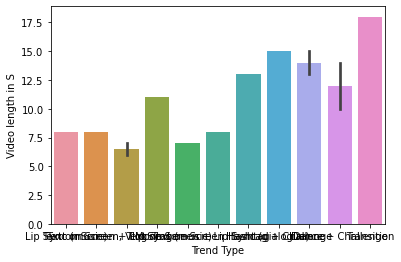

In [19]:
sns.barplot("Trend Type","Video length in S",data=pop_df)

Now let's plot the graph between theme and video length.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


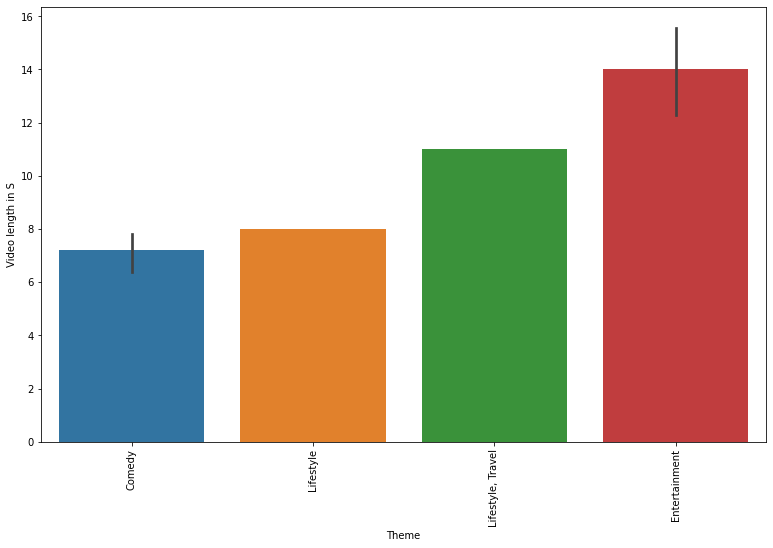

In [20]:
plt.figure(figsize=(13,8))
sns.barplot("Theme","Video length in S",data=pop_df)
plt.xticks(rotation=90)
plt.show()

### Observation 
Here we came to know that entertainment got the maximum video length , and comedy got the lowest video length in seconds.